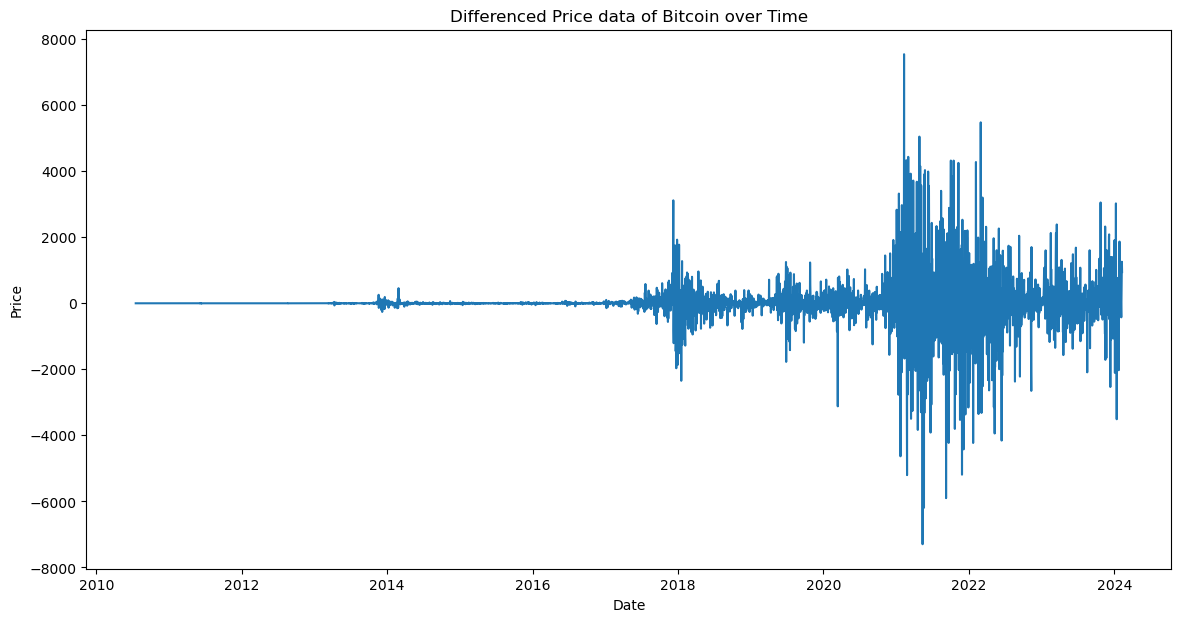

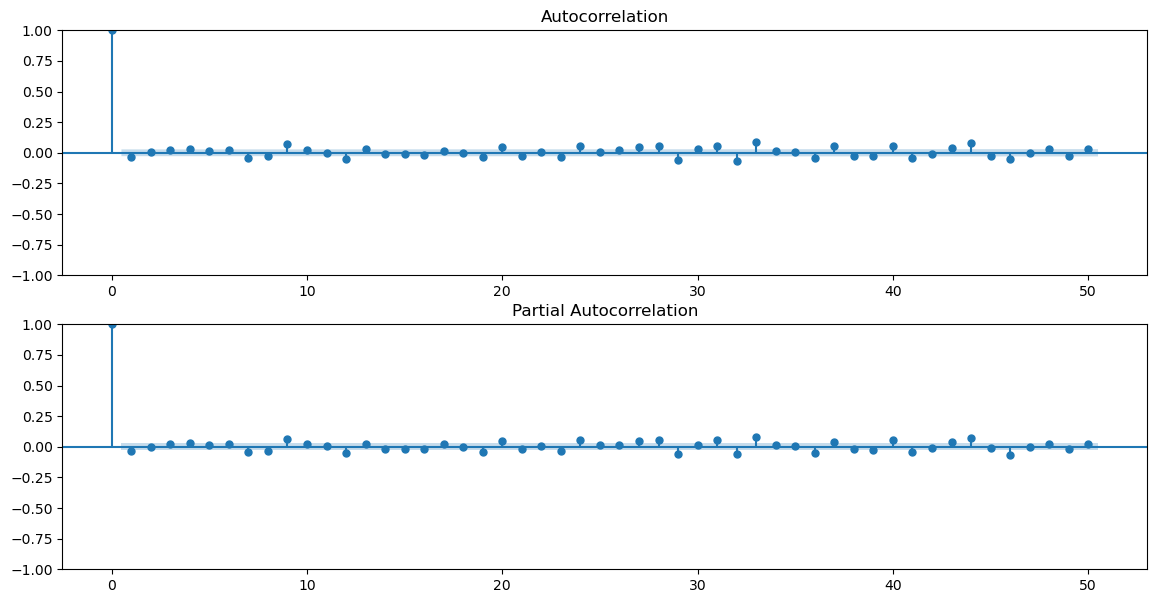

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
data = pd.read_csv('stationary1_data.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Plot the Opening Price of the day
plt.figure(figsize=(14, 7))
plt.plot(data['Open'])
plt.title('Differenced Price data of Bitcoin over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the ACF and PACF plots for Opening Price
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7))
plot_acf(data['Open'], lags=50, ax=ax1)
plot_pacf(data['Open'], lags=50, ax=ax2)
plt.show()


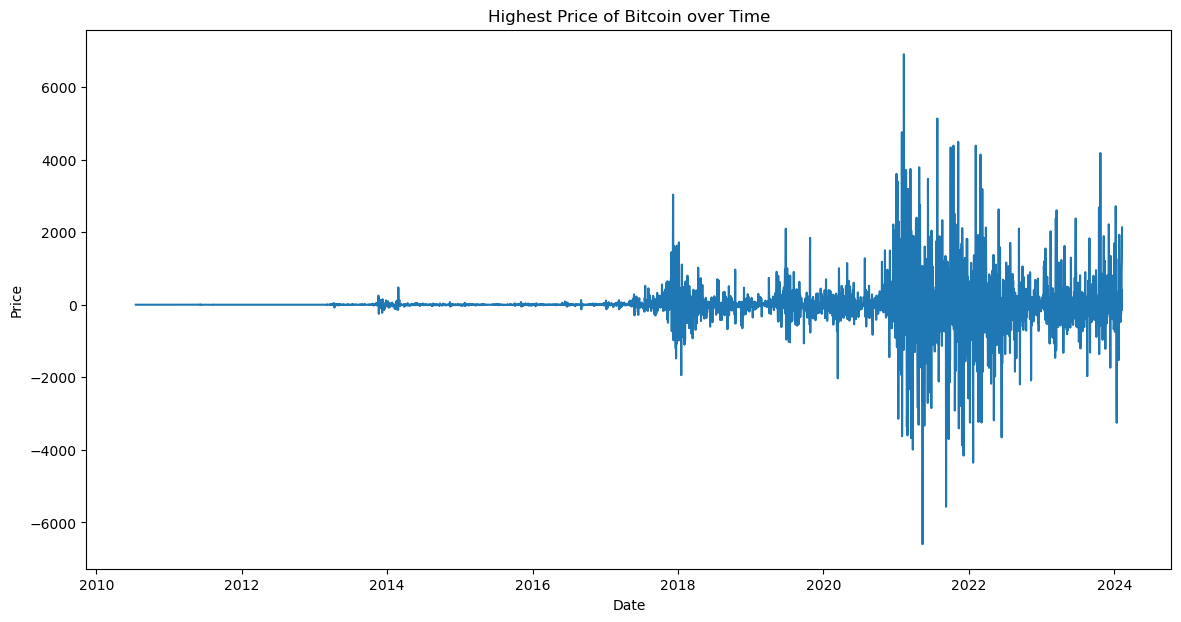

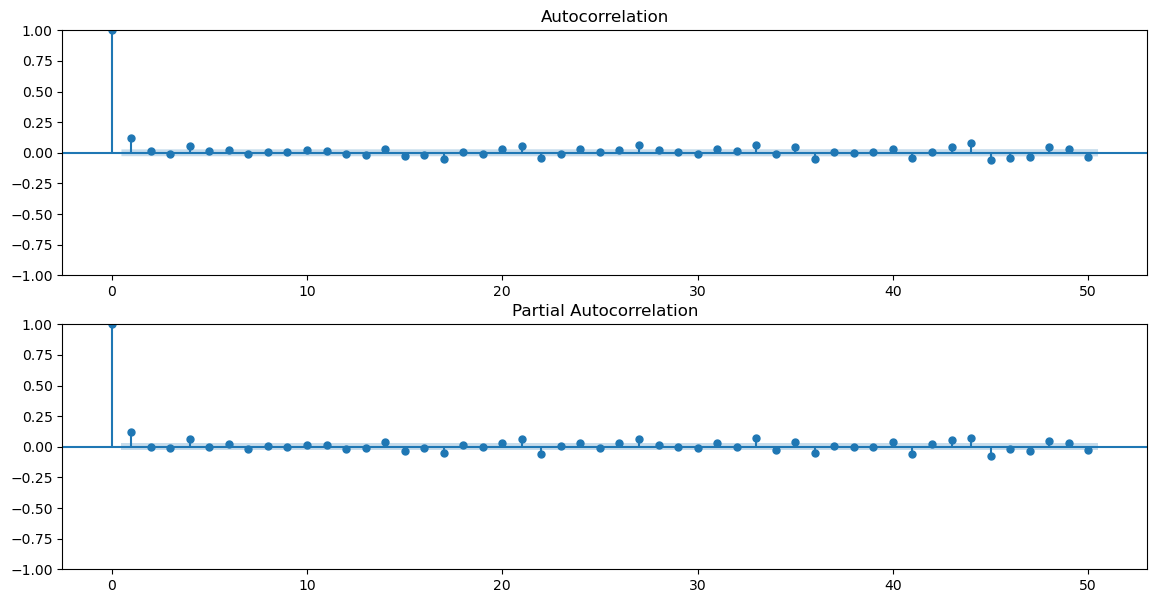

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
data = pd.read_csv('stationary1_data.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Plot the Highest Price of the day
plt.figure(figsize=(14, 7))
plt.plot(data['High'])
plt.title('Highest Price of Bitcoin over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the ACF and PACF plots for Highest Price
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7))
plot_acf(data['High'], lags=50, ax=ax1)
plot_pacf(data['High'], lags=50, ax=ax2)
plt.show()


<Figure size 800x400 with 0 Axes>

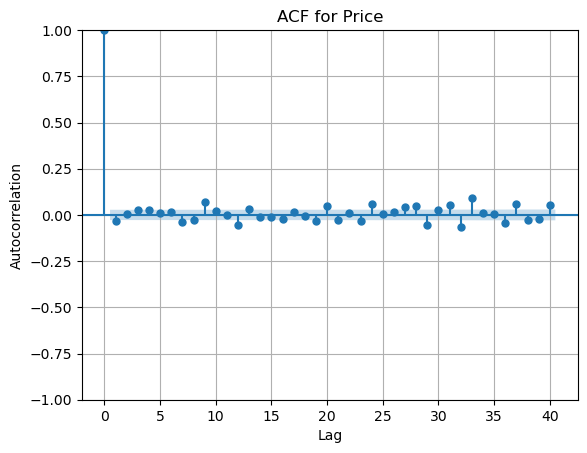

<Figure size 800x400 with 0 Axes>

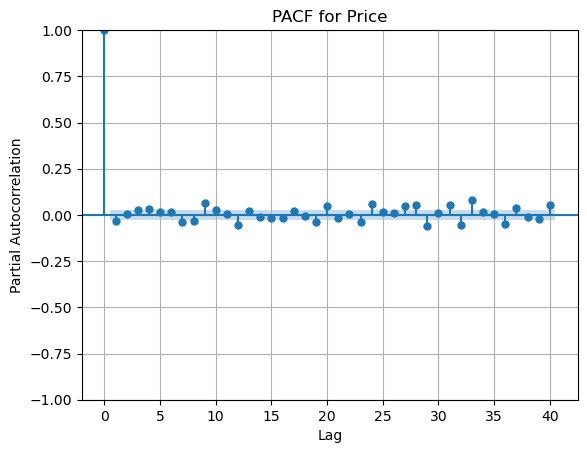

<Figure size 800x400 with 0 Axes>

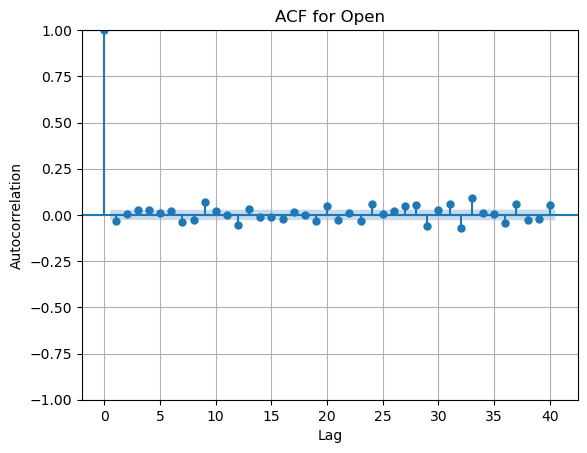

<Figure size 800x400 with 0 Axes>

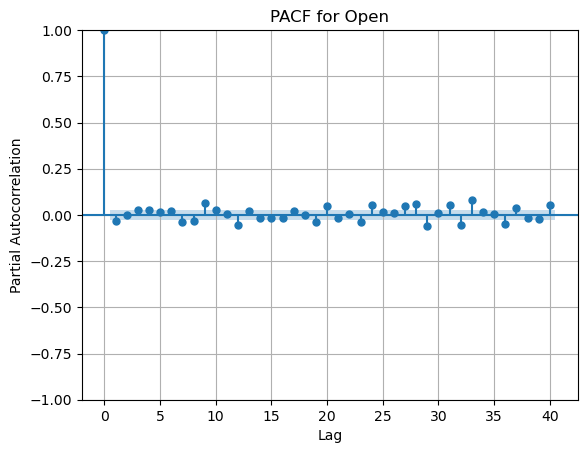

<Figure size 800x400 with 0 Axes>

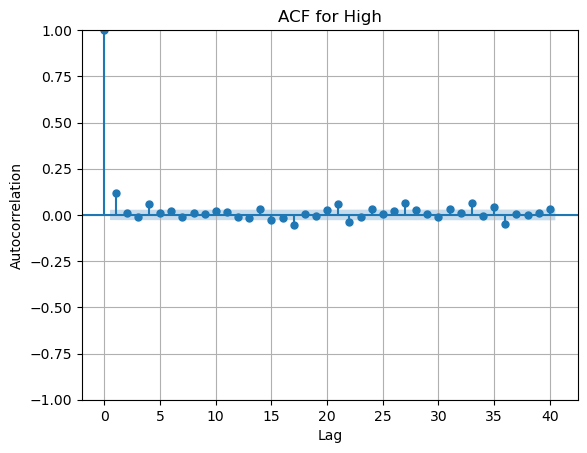

<Figure size 800x400 with 0 Axes>

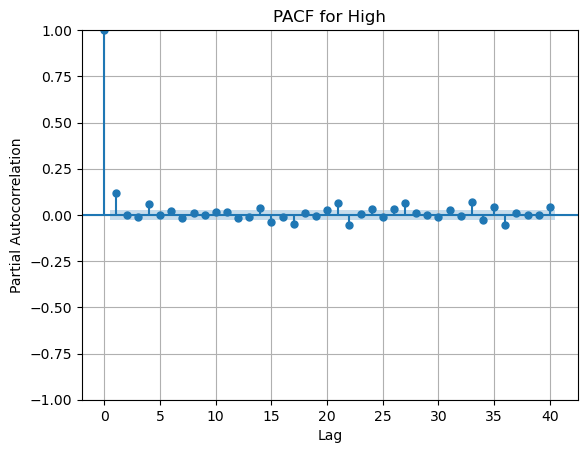

<Figure size 800x400 with 0 Axes>

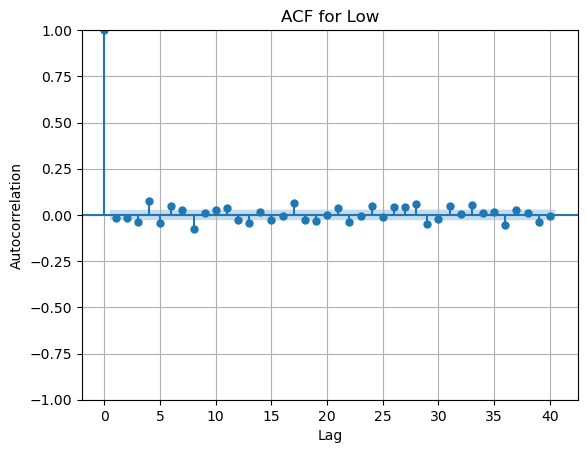

<Figure size 800x400 with 0 Axes>

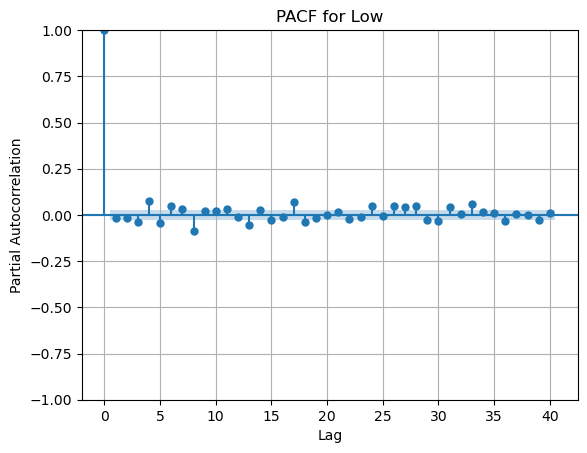

<Figure size 800x400 with 0 Axes>

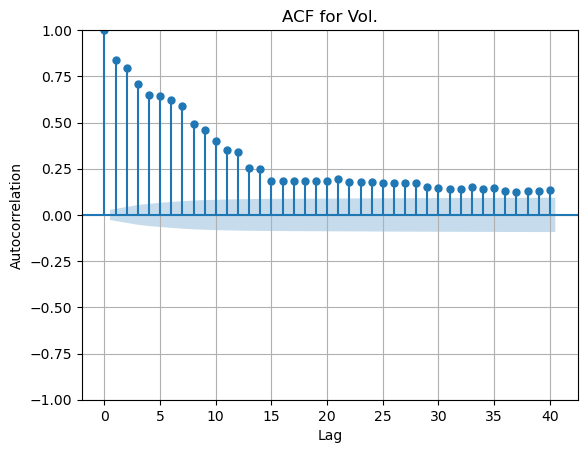

<Figure size 800x400 with 0 Axes>

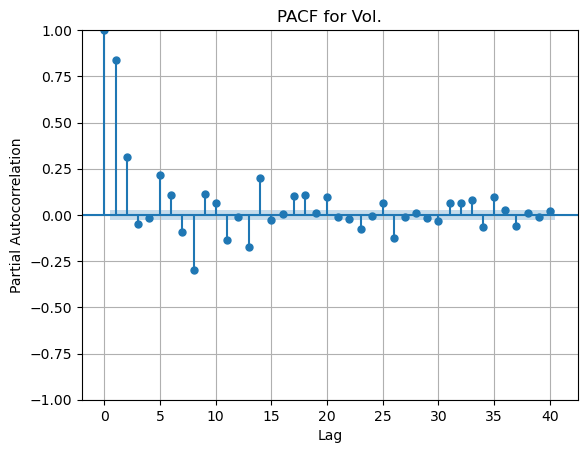

<Figure size 800x400 with 0 Axes>

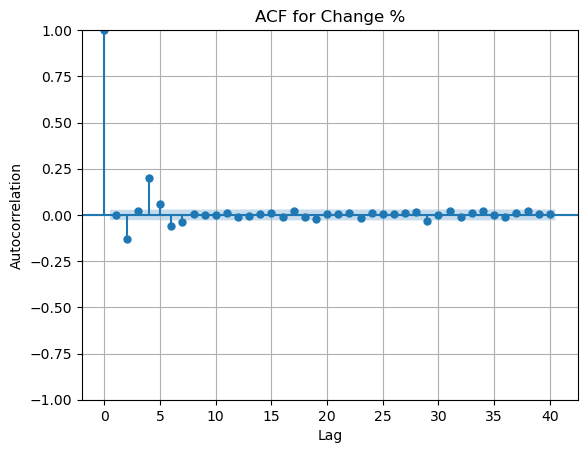

<Figure size 800x400 with 0 Axes>

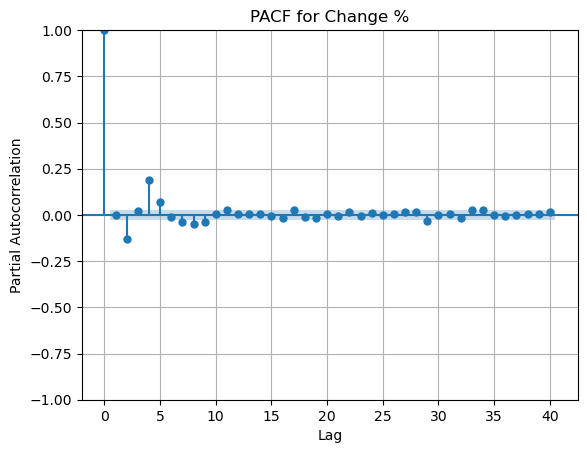

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the stationary dataset
data = pd.read_csv('stationary1_data.csv')

# Assuming 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %' are the columns in your dataset
columns_to_plot = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

for column in columns_to_plot:
    # Plot the ACF for the column
    plt.figure(figsize=(8, 4))
    plot_acf(data[column], lags=40, alpha=0.05)
    plt.title(f'ACF for {column}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

    # Plot the PACF for the column
    plt.figure(figsize=(8, 4))
    plot_pacf(data[column], lags=40, alpha=0.05)
    plt.title(f'PACF for {column}')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.grid(True)
    plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4955
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -39181.377
Date:                Wed, 24 Apr 2024   AIC                          78372.753
Time:                        13:24:50   BIC                          78405.293
Sample:                             0   HQIC                         78384.163
                               - 4955                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0340      0.538     -1.923      0.054      -2.088       0.020
ar.L2         -0.0340      0.019     -1.805      0.071      -0.071       0.003
ma.L1      -1.537e-05      0.543  -2.83e-05      1.0

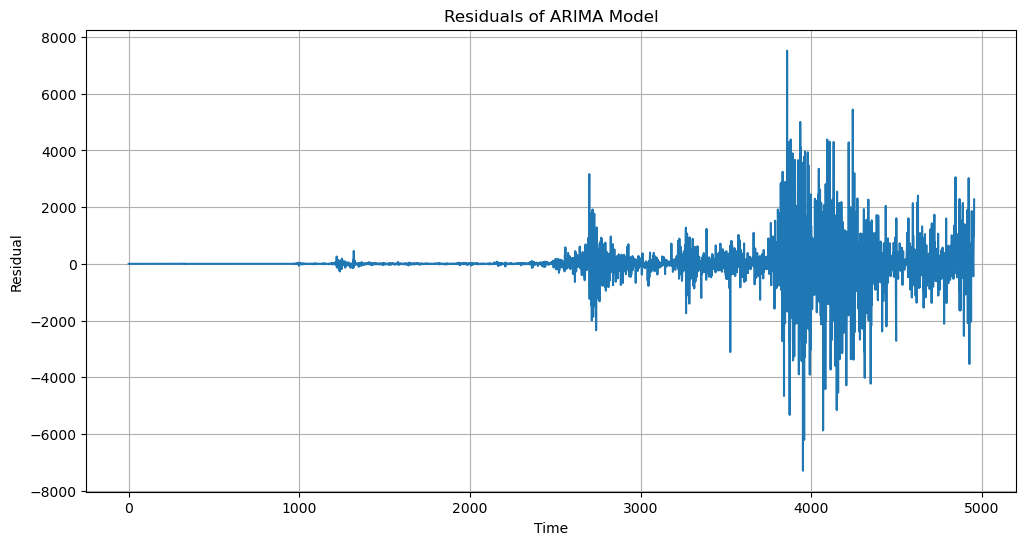

<Figure size 1200x600 with 0 Axes>

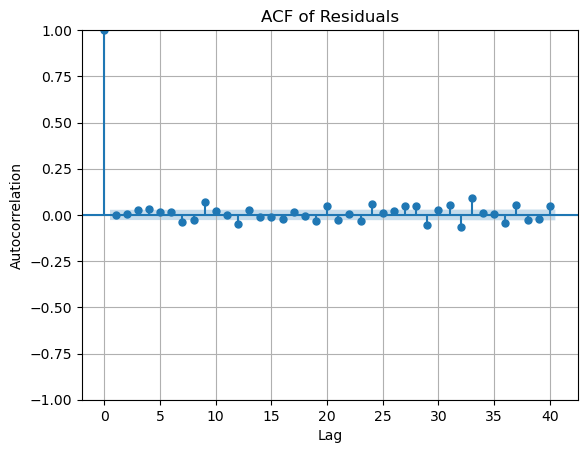

Ljung-Box Test - Statistics: lb_stat
Ljung-Box Test - p-values: lb_pvalue


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load the stationary dataset
data = pd.read_csv('stationary1_data.csv')

# Assuming 'Price' is the column containing Bitcoin prices
ts = data['Price']

# Fit an ARIMA model (Example values, you should use the best model from previous steps)
model = ARIMA(ts, order=(2, 1, 2))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Get the residuals
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

# Plot the ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, alpha=0.05)
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Perform the Ljung-Box test for autocorrelation of residuals
lb_test_stat, lb_p_value = acorr_ljungbox(residuals, lags=10)
print("Ljung-Box Test - Statistics:", lb_test_stat)
print("Ljung-Box Test - p-values:", lb_p_value)


In [22]:
import pandas as pd
from pmdarima import auto_arima

# Load the stationary dataset
data = pd.read_csv('stationary1_data.csv')

# Assuming 'Price' is the column containing Bitcoin prices
ts = data['Price']

# Use auto_arima to find the best ARIMA model
# Set seasonal=False for non-seasonal data
# Set trace=True to see the search progress
# Set error_action='ignore' to ignore any warnings
model = auto_arima(ts, seasonal=False, trace=True, error_action='ignore')

# Print the summary of the best model
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=78348.895, Time=5.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=78378.049, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=78374.356, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=78374.438, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=78373.072, Time=1.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=78373.571, Time=1.72 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=78376.495, Time=2.41 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=78350.389, Time=7.70 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=78376.300, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=78372.522, Time=1.88 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=78372.909, Time=1.99 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=78351.791, Time=5.73 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=78349.831, Time=13.08 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 42.433 seconds
       

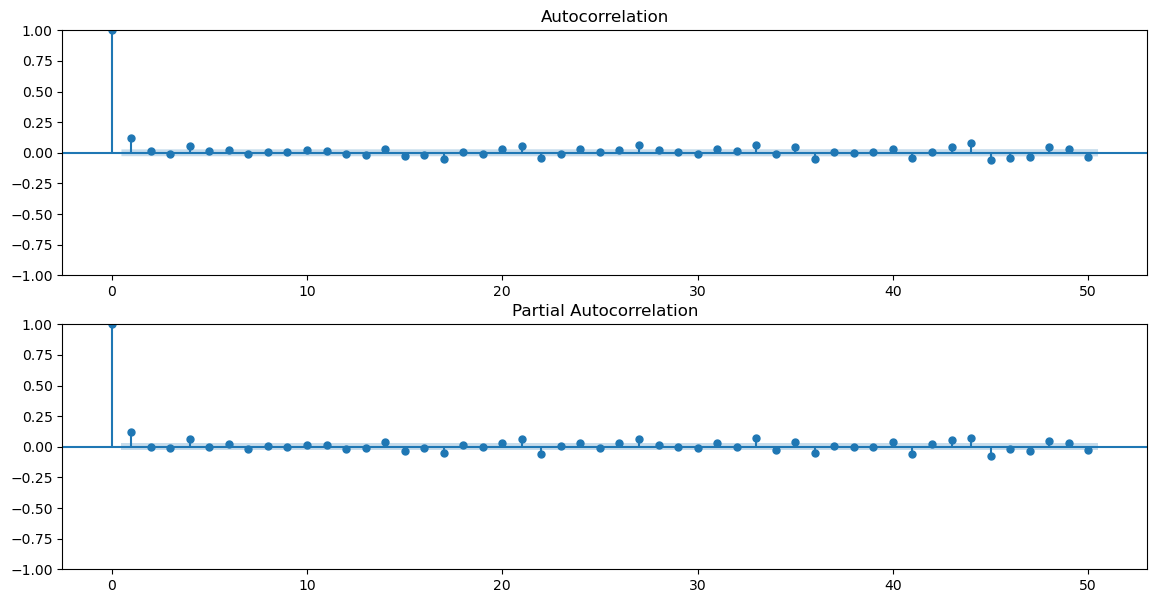

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot the ACF and PACF plots for Highest Price
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7))
plot_acf(data['High'], lags=50, ax=ax1)
plot_pacf(data['High'], lags=50, ax=ax2)
plt.show()
